## At first i'd like to indicate that candy data is dirty data that needs to be cleaned but along the way i'm going to make some visualizations and analysis too...

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
import re
plt.style.use('seaborn')
df = pd.read_excel('candyhierarchy2017.xlsx')

C:\Users\Abdul\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\Users\Abdul\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#### I started with importing the liberaries that i needed to do my cleaning and analysis

In [2]:
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',None)

#### I used the set_options functions to allow me to see the whole data so i could take a good look at it

## Showing some general properties of the data

In [3]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

#### After heading the data i didn't understand the values in the Q12 columns and the coordinates column and the Unnamed: 113 column so i'll just drop them later  and also the id column dosen't matter to me so i'll just drop it as well

In [4]:
df.shape

(2460, 120)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


## Starting with the cleaning process

In [6]:
df.duplicated().sum()

0

#### we can see that there are no duplicated values in the data 

In [7]:
for col in df.columns:
    new_col_name = col.replace('Q6 | ','')
    df.rename(columns={col : new_col_name}, inplace=True)

In [8]:
df.rename(columns={'Q1: GOING OUT?':'GOING OUT?','Q2: GENDER':'GENDER','Q3: AGE':'AGE','Q4: COUNTRY':'COUNTRY',
                   'Q5: STATE, PROVINCE, COUNTY, ETC':'AREA','Q10: DRESS':'DRESS',
                   'Q11: DAY':'DAY'},inplace=True)


#### i noticed that all the column names started with a Q and a number following that indicated the quistion number in the survey so i removed them as they don't matter to me now

In [9]:
df.drop(['Internal ID','Q7: JOY OTHER','Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Unnamed: 113',
         'Q12: MEDIA [Daily Dish]','Q12: MEDIA [Science]','Q12: MEDIA [ESPN]','Q12: MEDIA [Yahoo]',
         'Click Coordinates (x, y)'],axis=1,inplace=True)

#### dropping the columns as mentioned above....

In [10]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,AREA,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DRESS,DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH

#### i headed the data again to check if everything is in place

In [11]:
df.isna().sum()

GOING OUT?                                                                            110
GENDER                                                                                 41
AGE                                                                                    84
COUNTRY                                                                                64
AREA                                                                                  100
100 Grand Bar                                                                         747
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Any full-sized candy bar                                                              672
Black Jacks                                                                           958
Bonkers (the candy)                                                                   992
Bonkers (the board game)                                                             1006
Bottle Cap

#### we can see that the data has alot of missing values so i'll leave it as it is now and clean it along the way

# COLUMNS

## First the "GOING OUT" column

In [12]:
df['GOING OUT?'].fillna('NOT SPECIFIED',inplace=True)

#### i decided to fill the nans with not specified 

In [13]:
df['GOING OUT?'].value_counts()

No               2038
Yes               312
NOT SPECIFIED     110
Name: GOING OUT?, dtype: int64

<AxesSubplot:xlabel='GOING OUT?', ylabel='count'>

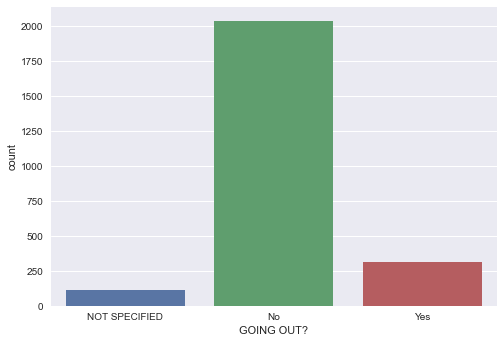

In [14]:
sns.countplot(x=df['GOING OUT?'],data=df)

### looks like not alot of people are going out that night...

## "GENDER" column

In [15]:
df['GENDER'].fillna("I'd rather not say",inplace=True)

#### i filled the nans with "i'd rather not say" as it was already a value in the column 

In [16]:
df['GENDER'].value_counts()

Male                  1467
Female                 839
I'd rather not say     124
Other                   30
Name: GENDER, dtype: int64

<AxesSubplot:xlabel='GENDER', ylabel='count'>

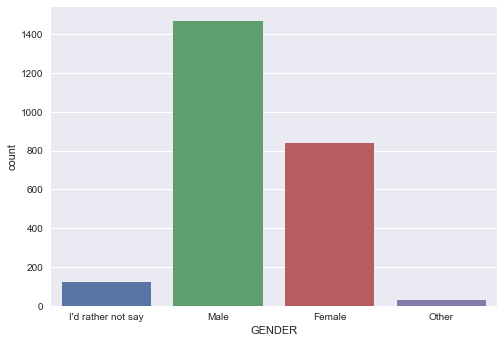

In [17]:
sns.countplot(x=df['GENDER'],data=df)

### here we can notice that males are almost double out the number of females

## "AGE" column

In [18]:
df['AGE'].value_counts()

40                                                  92
34                                                  90
37                                                  89
43                                                  86
42                                                  79
36                                                  79
35                                                  77
44                                                  76
38                                                  76
45                                                  75
33                                                  75
41                                                  74
50                                                  71
39                                                  69
49                                                  69
32                                                  68
48                                                  64
47                                                  63
30        

#### as we can see in the value_counts() alot of people don't take this quistion seriously and their answers are not valid so first i'm going to extract all the non integer values and set them to nan

In [19]:
bad_values = []
for i in df['AGE']:
    if isinstance(i,str):
        bad_values.append(i)
bad_values = pd.Series(bad_values)        

In [20]:
bad_values

0                                           Old enough
1                                                 Many
2                                                    ?
3                                                   no
4                                                45-55
5                                           hahahahaha
6                                      older than dirt
7                                                   5u
8                                               Enough
9                                       See question 2
10                                               24-50
11                                             Over 50
12                                          sixty-nine
13                                      46 Halloweens.
14                                             ancient
15                                                 OLD
16                                                 old
17                                                 old
18        

In [21]:
df.loc[df['AGE'].isin(bad_values),'AGE'] = np.nan

In [22]:
df['AGE'].value_counts()

40.0      92
34.0      90
37.0      89
43.0      86
42.0      79
36.0      79
35.0      77
38.0      76
44.0      76
45.0      75
33.0      75
41.0      74
50.0      71
39.0      69
49.0      69
32.0      68
48.0      64
47.0      63
30.0      62
53.0      57
46.0      55
52.0      50
56.0      46
27.0      45
31.0      45
51.0      41
28.0      37
54.0      36
58.0      34
55.0      32
60.0      31
29.0      27
57.0      25
59.0      24
26.0      23
62.0      20
61.0      20
63.0      20
25.0      19
64.0      17
24.0      16
21.0      14
65.0      13
20.0      12
22.0      11
18.0      10
23.0       9
12.0       9
66.0       9
70.0       8
68.0       8
15.0       8
11.0       7
72.0       6
67.0       6
71.0       6
13.0       6
17.0       5
69.0       5
73.0       4
16.0       4
9.0        4
75.0       3
10.0       3
19.0       3
6.0        2
76.0       2
90.0       2
8.0        2
7.0        2
14.0       2
100.0      2
1.0        1
70.5       1
77.0       1
1000.0     1
99.0       1

#### after removing all the strings we still have age values that are not real so i'm going to extract all the values larger than 100 and set them to 100 

In [23]:
df['AGE'] = pd.to_numeric(df['AGE'])

In [24]:
assert df['AGE'].dtype == 'float'

In [25]:
df.loc[df['AGE'] > 100, 'AGE'] = 100 

In [26]:
assert df['AGE'].max() <= 100 

In [27]:
df['AGE'].isna().sum()

108

#### there still are alot of nan values so i'm going to fill them the mean after checking that the mean and median have close values

In [28]:
df['AGE'].mean() , df['AGE'].median()


(42.14366496598639, 41.0)

In [29]:
df['AGE'].fillna(df['AGE'].mean(),inplace=True)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

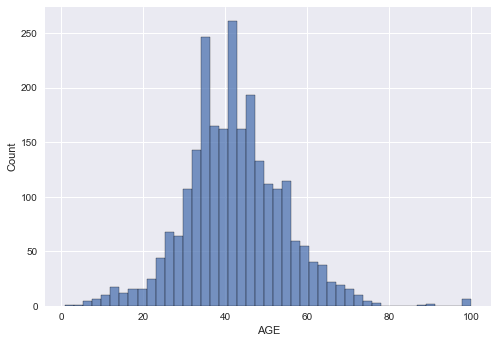

In [30]:
sns.histplot(x=df['AGE'],data=df)

### we can see here that the distribution is mostly normal and the majority of people participating in the survey age's range between 35 and 55  

## "COUNTRY" column 

In [31]:
df['COUNTRY'].value_counts()

USA                                                                     699
United States                                                           497
usa                                                                     217
Canada                                                                  179
Usa                                                                     139
US                                                                      126
USA                                                                      73
United States of America                                                 57
us                                                                       40
united states                                                            38
United States                                                            37
canada                                                                   34
United states                                                            19
Us          

#### here we can see that most of the values are similar but badly written so i'm going to make all the letters capital letters and remove all the spaces between them 

In [32]:
df['COUNTRY'] = df['COUNTRY'].str.upper()
df['COUNTRY'] = df['COUNTRY'].str.strip()

In [33]:
mapping = {'US':'USA','UNITED STATES':'USA','UNITED STATES OF AMERICA':'USA','U.S.':'USA',
           'U.S.A.':'USA','AMERICA':'USA','UNITES STATES':'USA','US OF A':'USA','THE UNITED STATES':'USA',
           'UNITED STATED':'USA','UNITED STATE':'USA','UNITED STSTES':'USA','UNITED KINGDOM':'UK'}
df['COUNTRY'] = df['COUNTRY'].replace(mapping)

#### here i'm going to map some badly written values to their true ones

In [34]:
bad_values = df['COUNTRY'].value_counts()[df['COUNTRY'].value_counts().values < 2].index
final = df['COUNTRY'].isin(bad_values)

#### here i extracted all the values that had a value_counts() less than 2 to replace their values with the mode 

In [35]:
df['COUNTRY'].loc[final] = 'USA'

C:\Users\Abdul\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
df['COUNTRY'].value_counts()

USA            2080
CANADA          224
UK               32
GERMANY          10
AUSTRALIA         7
NETHERLANDS       6
JAPAN             5
SCOTLAND          5
MEXICO            4
IRELAND           4
FRANCE            3
SWITZERLAND       3
DENMARK           2
CHINA             2
HONG KONG         2
SWEDEN            2
Name: COUNTRY, dtype: int64

In [37]:
df['COUNTRY'].isna().sum()

69

#### there is still some nans that i'm going to fill their values with the mode again...

In [38]:
df['COUNTRY'].fillna('USA',inplace=True)

In [39]:
df['COUNTRY'].value_counts()

USA            2149
CANADA          224
UK               32
GERMANY          10
AUSTRALIA         7
NETHERLANDS       6
JAPAN             5
SCOTLAND          5
MEXICO            4
IRELAND           4
FRANCE            3
SWITZERLAND       3
DENMARK           2
CHINA             2
HONG KONG         2
SWEDEN            2
Name: COUNTRY, dtype: int64

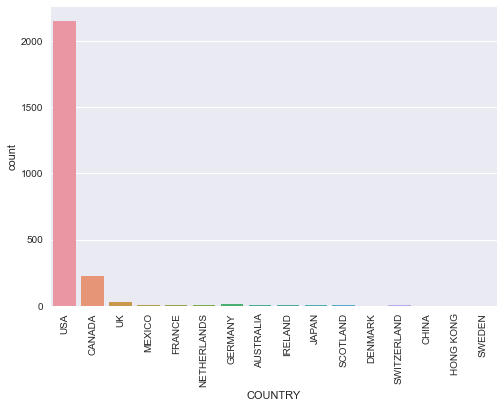

In [40]:
sns.countplot(x=df['COUNTRY'],data=df)
plt.xticks(rotation=90) 
plt.show()

### here we can see that most of the people who participated in the survey are from the USA 

## "AREA" column

In [41]:
df['AREA'] = df['AREA'].str.strip()
df['AREA'] = df['AREA'].str.upper()
df['AREA'].value_counts()

CALIFORNIA                                            171
CA                                                    128
ONTARIO                                                79
ILLINOIS                                               72
TEXAS                                                  71
OREGON                                                 62
WA                                                     60
NY                                                     60
NEW YORK                                               55
PENNSYLVANIA                                           47
BC                                                     46
MA                                                     46
MASSACHUSETTS                                          46
OHIO                                                   46
WASHINGTON                                             45
PA                                                     41
VIRGINIA                                               38
COLORADO      

#### like the country column there are alot of values that are badly written so i'll start by capitalizing all the letters and removing all the spaces between them then i'll map them to their right values 

In [42]:
mapping_2 = {'CA':'CALIFORNIA','IL':'ILLINOIS','NY':'NEW YORK','NC':'NEW YORK','MO':'MINNESOTA','MD':'MARYLAND'} 

In [43]:
df['AREA'] = df['AREA'].replace(mapping_2)

In [44]:
bad_values_2 = df['AREA'].value_counts()[df['AREA'].value_counts().values < 4].index
final_2 = df['AREA'].isin(bad_values_2)

#### here i extracted all the values that had value_counts() less than 4 and mapped their values to one of the modes  

In [45]:
df['AREA'].loc[final_2] = 'CALIFORNIA'

C:\Users\Abdul\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
df['AREA'].value_counts()

CALIFORNIA          607
NEW YORK            140
ILLINOIS            104
ONTARIO              79
TEXAS                71
OREGON               62
WA                   60
PENNSYLVANIA         47
MASSACHUSETTS        46
MA                   46
BC                   46
OHIO                 46
WASHINGTON           45
MINNESOTA            42
MARYLAND             41
PA                   41
VIRGINIA             38
COLORADO             37
MN                   36
ALBERTA              31
FLORIDA              31
MICHIGAN             30
VA                   29
WISCONSIN            27
MISSOURI             25
TX                   23
OR                   23
MAINE                21
GA                   21
GEORGIA              20
INDIANA              20
NJ                   18
NEW JERSEY           18
MI                   17
ARIZONA              17
IOWA                 16
NORTH CAROLINA       16
BRITISH COLUMBIA     13
CO                   13
FL                   13
UTAH                 13
KANSAS          

In [47]:
df['AREA'].isna().sum()

102

#### we can see that there is still alot of missing values so i'll replace those with the value of a different mode to ensure my data is balanced

In [48]:
df['AREA'].fillna('NEW YORK', inplace=True)

In [49]:
assert df['AREA'].isna().sum() == 0

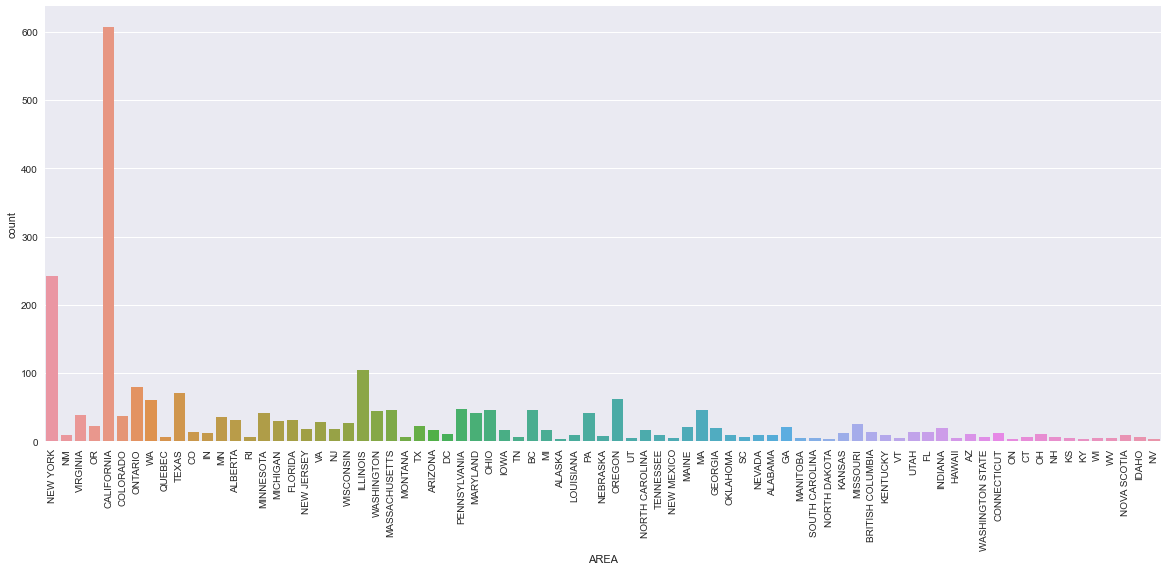

In [50]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['AREA'],data=df)
plt.xticks(rotation=90) 
plt.show()

### here we can see that most of the participants are from new york and california and some are from diffent states

## Candy columns

In [51]:
df.sample(10)

,GOING OUT?,GENDER,AGE,COUNTRY,AREA,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DRESS,DAY
1937,No,Female,49.0,USA,FLORIDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2130,No,Male,52.0,CANADA,ONTARIO,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,Blue and black,Sunday
2112,No,Male,34.0,USA,MICHIGAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1209,No,Male,52.0,USA,CALIFORNIA,JOY,JOY,JOY,JOY,MEH,MEH,MEH,MEH,MEH,JOY,JOY,JOY,MEH,JOY,MEH,MEH,JOY,MEH,JOY,MEH,MEH,JOY,JOY,MEH,MEH,MEH,JOY,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,MEH,JOY,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY,JOY,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,JOY,JOY,JOY,JOY,MEH,JOY,ME

#### after drawing some samples i noticed that thre are alot of people who didn't answer any quistions about the candy so i'll just drop them 

In [52]:
df.dropna(axis=0,how='all',subset=df.columns[5:],inplace=True)

In [53]:
df.isna().sum()

GOING OUT?                                                                             0
GENDER                                                                                 0
AGE                                                                                    0
COUNTRY                                                                                0
AREA                                                                                   0
100 Grand Bar                                                                         93
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     80
Any full-sized candy bar                                                              18
Black Jacks                                                                          304
Bonkers (the candy)                                                                  338
Bonkers (the board game)                                                             352
Bottle Caps          

#### there is still alot of missing values so i'm going to fill them with "NOT SPECIFIED" 

In [54]:
df.fillna('NOT SPECIFIED',inplace=True)

In [55]:
df.isna().sum()

GOING OUT?                                                                           0
GENDER                                                                               0
AGE                                                                                  0
COUNTRY                                                                              0
AREA                                                                                 0
100 Grand Bar                                                                        0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0
Any full-sized candy bar                                                             0
Black Jacks                                                                          0
Bonkers (the candy)                                                                  0
Bonkers (the board game)                                                             0
Bottle Caps                                

#### there is no missing values left...

In [56]:
ordered = pd.DataFrame(columns=['NAME','JOY','MEH','DESPAIR'])
for col in df.columns[5:100]:
    num_joy = df[col].value_counts()['JOY']
    num_meh = df[col].value_counts()['MEH']
    num_despaire = df[col].value_counts()['DESPAIR']
    ordered = ordered.append({'NAME':col,'JOY':num_joy,'MEH':num_meh,'DESPAIR':num_despaire},ignore_index=True)
ordered

,NAME,JOY,MEH,DESPAIR
0,100 Grand Bar,873,755,85
1,Anonymous brown globs that come in black and o...,176,461,1089
2,Any full-sized candy bar,1559,212,17
3,Black Jacks,92,617,793
4,Bonkers (the candy),116,857,495
5,Bonkers (the board game),193,715,546
6,Bottle Caps,465,670,560
7,Box'o'Raisins,117,476,1179
8,Broken glow stick,24,105,1625
9,Butterfinger,1177,460,141


#### here i created a new data frame to store the values of joy, meh, despaire in so i can see the top values of each

In [57]:
top_joy = ordered.sort_values('JOY',ascending=False)
top_10_joy = top_joy.iloc[:10,:]
top_10_joy

,NAME,JOY,MEH,DESPAIR
2,Any full-sized candy bar,1559,212,17
75,Reese’s Peanut Butter Cups,1498,188,95
44,Kit Kat,1447,287,52
14,"Cash, or other forms of legal tender",1439,276,65
83,Snickers,1399,292,79
94,Tolberone something or other,1320,350,84
57,Peanut M&M’s,1291,377,121
49,Lindt Truffle,1277,367,98
69,Nestle Crunch,1188,472,102
55,Milky Way,1185,485,102


#### i subsetted for the top 10 joy values

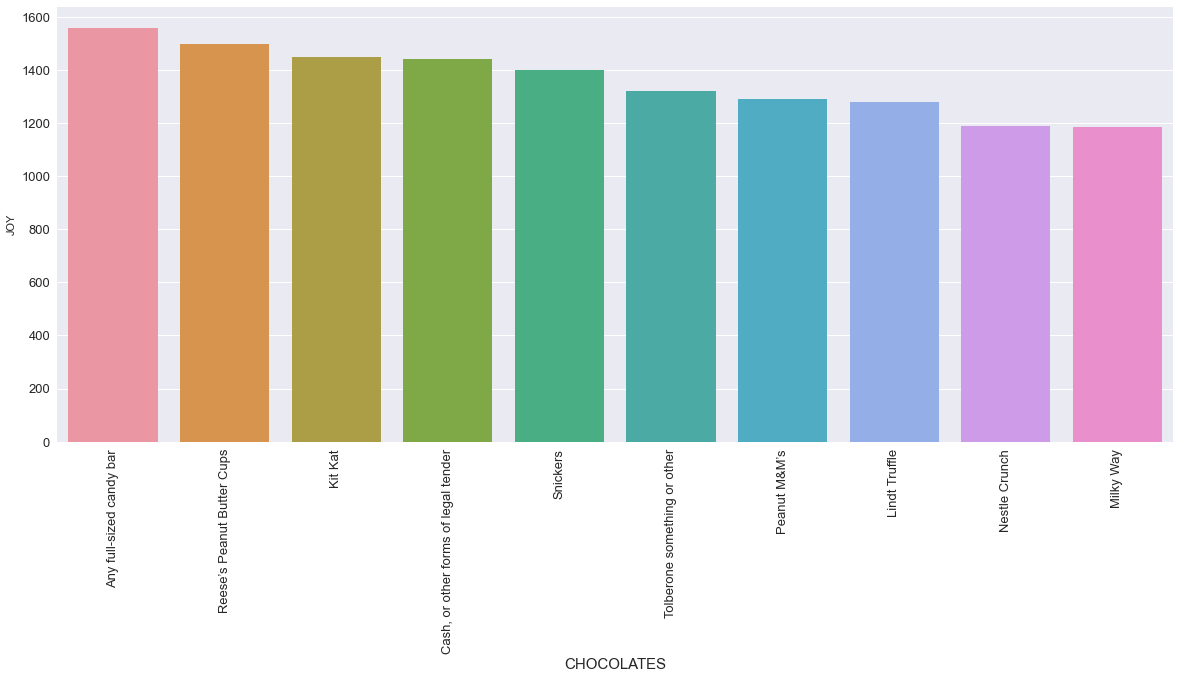

In [58]:
plt.figure(figsize=(20,8))
sns.barplot(x='NAME',y='JOY',data= top_10_joy)
plt.xlabel('CHOCOLATES',fontsize=15)
plt.xticks(rotation=90) 
plt.tick_params(labelsize=13)
plt.show()

### here we can see the top 10 joy values

In [59]:
top_despair = ordered.sort_values('DESPAIR',ascending=False)
top_10_despair = top_despair.iloc[:10,:]
top_10_despair

,NAME,JOY,MEH,DESPAIR
8,Broken glow stick,24,105,1625
74,Real Housewives of Orange County Season 9 Blue...,91,136,1480
28,Gum from baseball cards,44,238,1462
42,Kale smoothie,108,173,1435
20,Dental paraphenalia,91,244,1433
19,Creepy Religious comics/Chick Tracts,246,104,1406
12,Candy that is clearly just the stuff given out...,39,405,1325
92,Those odd marshmallow circus peanut things,189,283,1252
7,Box'o'Raisins,117,476,1179
24,Generic Brand Acetaminophen,162,391,1176


#### i also subsetted for the top 10 despaire values 

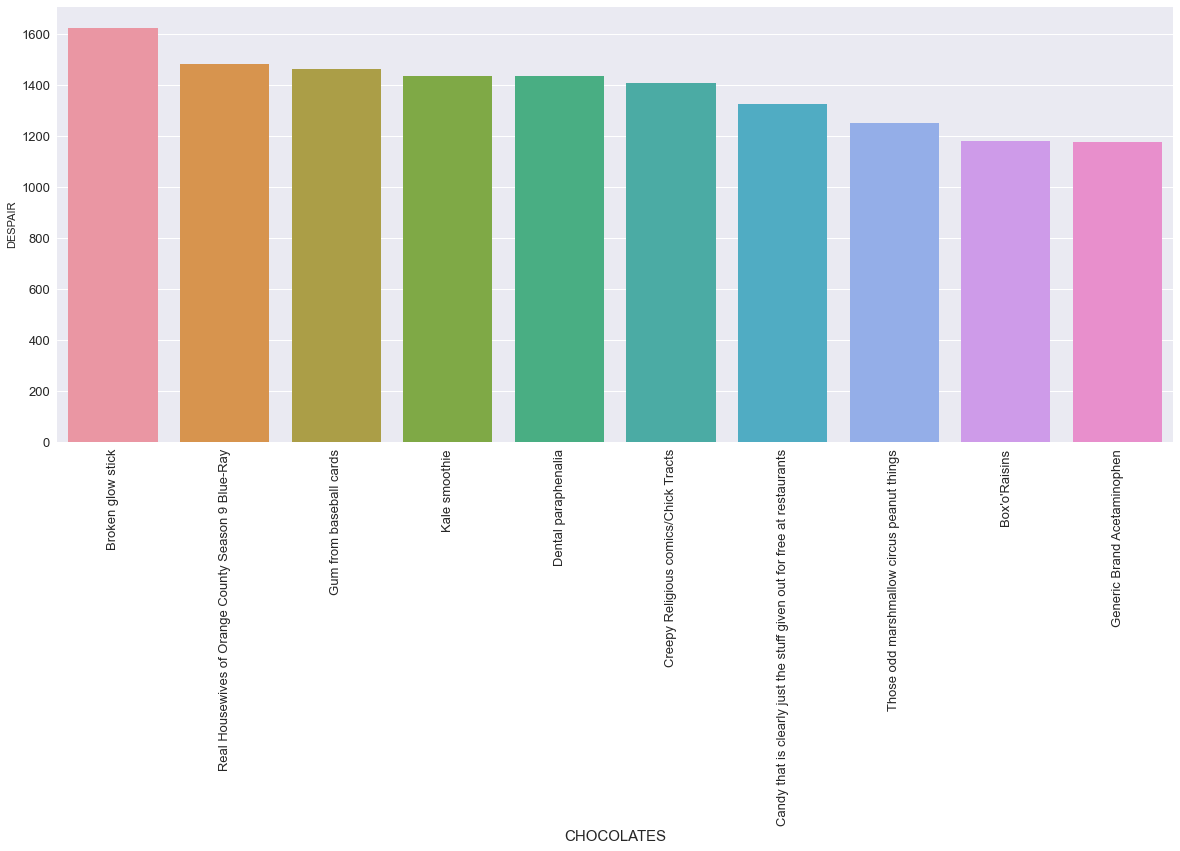

In [60]:
plt.figure(figsize=(20,8))
sns.barplot(x='NAME',y='DESPAIR',data=top_10_despair)
plt.xlabel('CHOCOLATES',fontsize=15)
plt.xticks(rotation=90) 
plt.tick_params(labelsize=13)
plt.show()

### and here we can see the top 10 despaire values

In [61]:
df['DRESS'].value_counts()

White and gold    1081
Blue and black     635
NOT SPECIFIED       90
Name: DRESS, dtype: int64

In [62]:
df['DRESS'].isna().sum()

0

#### there is no missing values

<AxesSubplot:xlabel='DRESS', ylabel='count'>

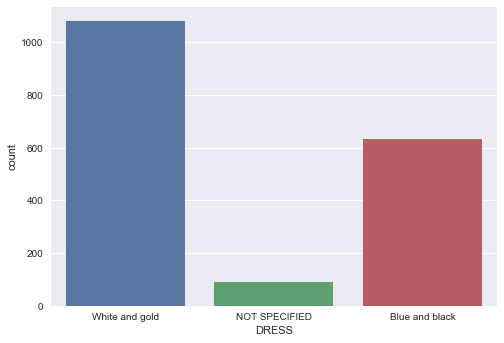

In [63]:
sns.countplot(x=df['DRESS'],data=df)

### we can see that more people are wearing white and gold dresses

In [64]:
df['DAY'].value_counts()

Friday           1091
Sunday            644
NOT SPECIFIED      71
Name: DAY, dtype: int64

In [65]:
df['DAY'].isna().sum()

0

#### no missing values

<AxesSubplot:xlabel='DAY', ylabel='count'>

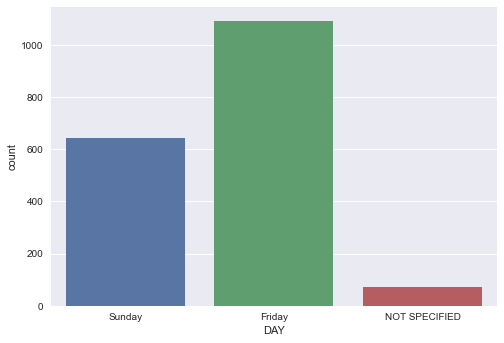

In [66]:
sns.countplot(x=df['DAY'],data=df)

### more people are celebrating on Friday